
# Project: Investigate a Dataset - TMDB Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDB) is a website which provides detailed information about movies and TV shows like runtime, popularity, budget, revenue, etc. Using TMDB API, the database can be fetched in csv format.

The databse of TMDB can be used to answer several queries respect to movies using certain visualisation of trends.

Three questions that this analysis will discuss about is - 

__1. Which genre has been popular over the year ? Which one was popular over certain time period ? __

__2. How popularity is related to budget and revenue ? Does higher budget means high popularity or high popularity means high revenue ?__

__3. Does high budget movie always leads to higher revenue?__



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#loading file 
df = pd.read_csv('tmdb_movies.csv')


<a id='wrangling'></a>
## Data Wrangling


### General Properties

Checking for characteristics of database - 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

Checking if there is some duplicate rows present in database, if so duplicated row has to be deleted. 

In [3]:
sum(df.duplicated())

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

As per the question posed in the introduction section following analysis has been done with some conclusions.


### Research Question 1
### Which genre has been popular over the years ?

Since genre is one of the variable for this analysis, dropping of rows where there is no value i.e. NULL has to be done.

In [6]:
#removing NA values

df_genre = df.dropna(subset=['genres'])
df_genre.iloc[:,13:14]

,genres
0,Action|Adventure|Science Fiction|Thriller
1,Action|Adventure|Science Fiction|Thriller
2,Adventure|Science Fiction|Thriller
3,Action|Adventure|Science Fiction|Fantasy
4,Action|Crime|Thriller
5,Western|Drama|Adventure|Thriller
6,Science Fiction|Action|Thriller|Adventure
7,Drama|Adventure|Science Fiction
8,Family|Animation|Adventure|Comedy
9,Comedy|Animation|Family


Genre is given as string with multiple values in the column. For accurate trends the string has to be divided in multiple rows.

In [7]:
#splitting string based on deliminator and converting to list 
df_genre['genres'] = df_genre['genres'].apply(lambda x: x.split("|"))


/home/ankit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# appending new column genre and new rows also dropping the column genres

clean =(df_genre['genres'].apply(lambda x: pd.Series(x))
            .stack()
            .reset_index(level=1, drop=True)
            .to_frame('genre')
            .join(df_genre, how='left')
            .drop(columns= 'genres'))

clean.head()

,genre,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,Adventure,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,Science Fiction,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,Thriller,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Action,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [9]:
#contains list of unique genres in the database

unique_genres = clean.genre.unique()
unique_genres


array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

Since dataset is big and contains year from 1966 to 2015 (for popular movies) we need to divide years in group of 10. Following function creates new dataframe with these condition and returns it.

Also the new data frame will contain only popular movies to achieve this we only take rows with popularity score greater then the mean popularity between that time period. Purpose is this to make the trend fair as overall popularity mean will make the statistics biased and conclusion might be wrong.

In [10]:
def data_frame_divider(df_ ,year1 , year2):
    """
    Divides dataframe between year1 and year2
    
    returns new divided data frame with popularity condition
    """
    df_temp = df_.query('release_year >= {} and release_year <= {}'.format(year1,year2))
    df_time_range_mean = df_temp['popularity'].mean()
    
    return df_temp.query('popularity >= {} ' .format(df_time_range_mean))



Following function counts number of occurance of particular genre in the dataframe 

In [11]:
def genre_counter(df):
    """
    Accepts data frame as input 
    
    returns count of genre in provided data frame
    """
    df_genere_count = []
    for genre in unique_genres:
        length = len(df.query('genre == "{}"'.format(genre)))
        df_genere_count.append(length)
        
    return df_genere_count

In [12]:
#for 1966-1975

df_66_75 = data_frame_divider(clean,1966,1975)

df_count_array_66_75 = genre_counter(df_66_75)

In [13]:
# for 1976-1985
df_76_85 = data_frame_divider(clean,1976,1985)

df_count_array_76_85 = genre_counter(df_76_85)

In [14]:
# for 1986-1995

df_86_95 = data_frame_divider(clean,1986,1995)

df_count_array_86_95 = genre_counter(df_86_95)

In [15]:
#for 1996-2005
df_96_05 = data_frame_divider(clean,1996,2005)

df_count_array_96_05 = genre_counter(df_96_05)

In [16]:
#for 2006-2015
df_06_15 = data_frame_divider(clean,2006,2015)

df_count_array_06_15 = genre_counter(df_06_15)

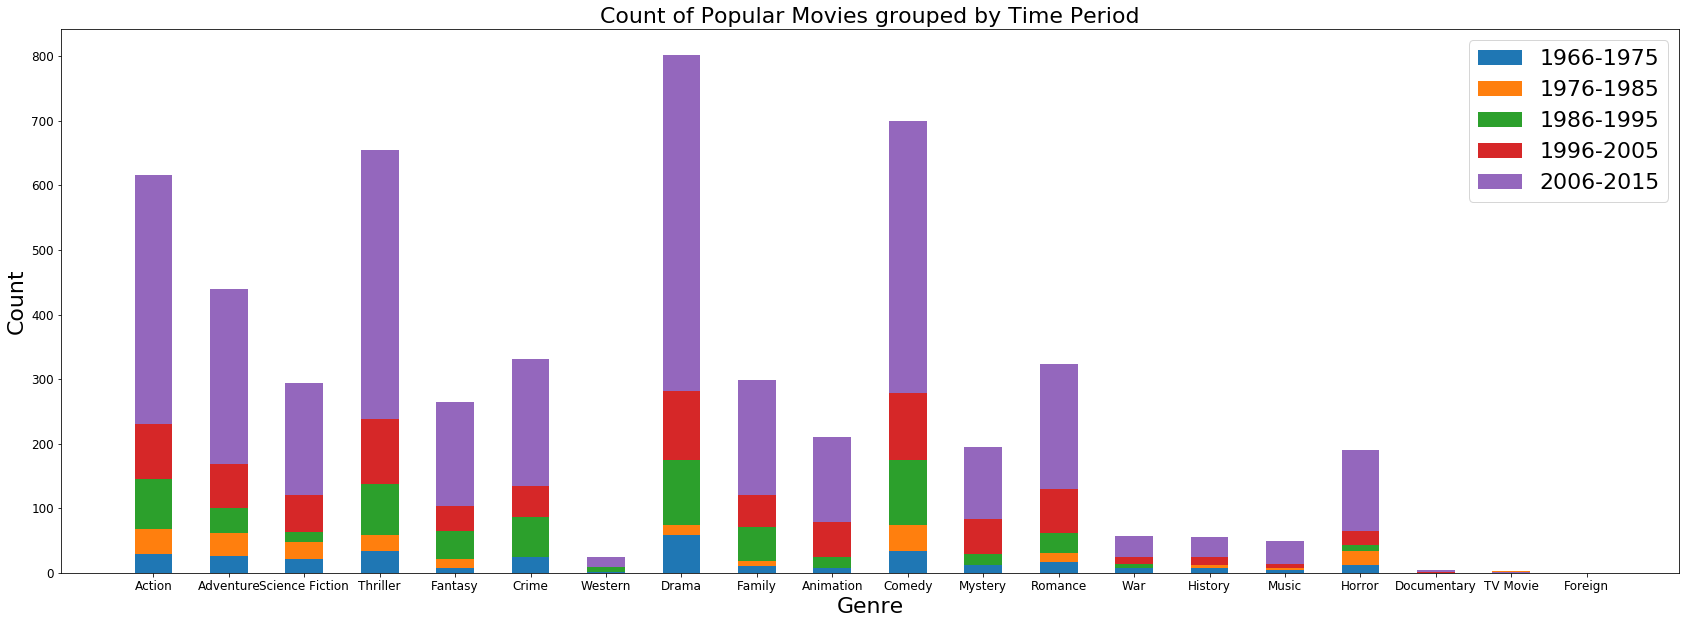

In [17]:
#plotting values based on genre count and genre over time period

ind = np.arange(len(unique_genres))
width = 0.5

plt.figure(figsize=(29,10))

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 22

#taken from documentation
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

p1 = plt.bar(ind, df_count_array_66_75, width)
p2 = plt.bar(ind, df_count_array_76_85,  width , bottom = df_count_array_66_75)
p3 = plt.bar(ind, df_count_array_86_95, width , bottom = df_count_array_76_85)
p4 = plt.bar(ind, df_count_array_96_05, width , bottom = df_count_array_86_95)
p5 = plt.bar(ind, df_count_array_06_15, width , bottom = df_count_array_96_05)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Popular Movies grouped by Time Period')
plt.xticks(ind, unique_genres)
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0]) , ('1966-1975','1976-1985','1986-1995','1996-2005','2006-2015'))
plt.show()


### Result 

For period __1966 - 2015__ , __Drama__ has been the most popular genre while next two popular genre was __Comedy__ and __Thriller__   

Rest observation for particular time group was -

- 1966-1975 - Drama

- 1976-1985 - Action

- 1986-1995 - Drama

- 1996-2005 - Drama

- 2006-2015 - Drama

As we can see Drama category has been popular for most period of time only lagging behind at time period 1976-1985

### Research Question 2

### How budget and revenue relates with popularity of a movie ?

Following analysis tries to relate popularity with budget and revenue, since adjusted budget and revenue is provided which accounts for inflation. Adjusted value will be used.

Again for the this analysis we need to divide movies based on popularity to check characterisitics of movie. Also removing rows with budget and revenue with value 0. Here we will take popularity mean for overall period rather than particular time group.

In [18]:
popularity_mean_1960_2015 = df.popularity.mean()

df_popular_movies = df.query('popularity >= {} and budget_adj > {} and revenue_adj > {}'.format(popularity_mean_1960_2015,0.0,0.0))
df_less_popular_movies = df.query('popularity < {} and budget_adj > {} and revenue_adj > {}'.format(popularity_mean_1960_2015,0.0,0.0))

In [19]:
df_popular_movies.iloc[: , 19:].describe()

,budget_adj,revenue_adj
count,2.314000e+03,2.314000e+03
mean,5.578504e+07,1.963920e+08
std,4.949508e+07,2.544605e+08
min,1.144773e+01,2.289547e+01
25%,2.008861e+07,4.340947e+07
50%,3.988926e+07,1.124268e+08
75%,7.804488e+07,2.419284e+08
max,3.683713e+08,2.827124e+09


In [20]:
df_less_popular_movies.iloc[: , 19:].describe()

,budget_adj,revenue_adj
count,1.540000e+03,1.540000e+03
mean,2.689244e+07,4.791964e+07
std,2.904307e+07,7.980277e+07
min,9.693980e-01,2.370705e+00
25%,7.499988e+06,5.642549e+06
50%,1.841364e+07,2.323911e+07
75%,3.614780e+07,5.849941e+07
max,4.250000e+08,8.530813e+08


### Comparision of Popularity with Budget 

Using the describe() function of pandas we can see that the mean budget for popular movies is 5.58e+08 while for less popular movies is 2.69e+07 which is lower. 

Means these two parameters are correlated. Scatter Plot for these two variables can describe this correlation.


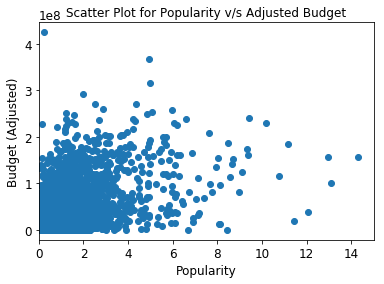

In [35]:
plt.rc('axes', titlesize=MEDIUM_SIZE) 
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.xlim([0, 15])

plt.title('Scatter Plot for Popularity v/s Adjusted Budget')
plt.xlabel('Popularity')
plt.ylabel('Budget (Adjusted)')
plt.scatter(df['popularity'],df['budget_adj'])
plt.show()

### Comparision of Popularity with Revenue

Using same result we can see that mean revenue for popular movies is 1.96e+08 while for less popular movies is 4.97e+07 which is lower. 

Hence the same correlation is also shown here in these two parameters 

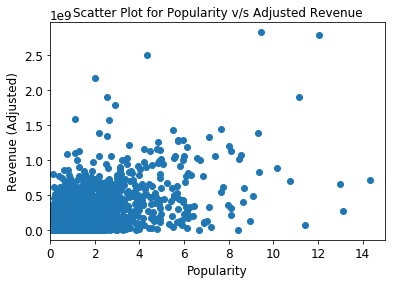

In [36]:
plt.xlim([0, 15])
plt.title('Scatter Plot for Popularity v/s Adjusted Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue (Adjusted)')
plt.scatter(df['popularity'],df['revenue_adj'])
plt.show()

### Research Question 3

### How budget relates to revenue  ?


Apart from some outliers, majority of movies show strong correlation for budget and revenue, which can be seen below in scatter plot.

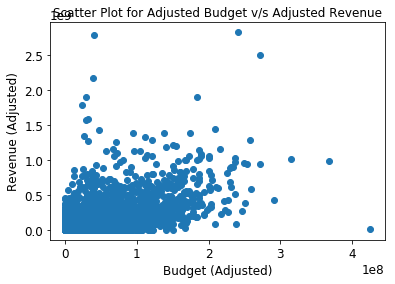

In [38]:
plt.title('Scatter Plot for Adjusted Budget v/s Adjusted Revenue')
plt.xlabel('Budget (Adjusted)')
plt.ylabel('Revenue (Adjusted)')
plt.scatter(df['budget_adj'],df['revenue_adj'])
plt.show()

<a id='conclusions'></a>
## Conclusions


__1. Which genre has been popular over the year ? Which one was popular over certain time period ? __

Drama has been popular when looked at whole dataset at once, also when grouped in time period majority of the time Drama dominated popular movies.

__2. How popularity is related to budget and revenue ? Does higher budget means high popularity or high popularity means high revenue ?__

With some outliers popularity can be seen strongly correlated to both budget and revenue. Hence high popularity results in both high budget and high revenue and vice versa.

__3. Does high budget movie always leads to higher revenue?__

Budget and Revenue is also strongly correlated as seen from the scatter plot which means high budget movie is most probably result in high revenue.


Using several visualisation techinique we can analyse movie dataset and develop some trends. With some more parameters these data combined with others can also help in deciding which movie will perform better in future releases.  